# Notebook 03 – Decision Tree Model & Hyperparameter Tuning

In [1]:
import pandas as pd
import joblib

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

## Loads dataset

In [2]:
data_path = r"C:/Users/USER/PycharmProjects/ML/data/Telco-Customer-Churn.csv"
df = pd.read_csv(data_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Clean data

In [3]:
df = df.drop("customerID", axis=1)

# Convert to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

# Encode churn
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

## Load Preprocessor

In [4]:
preprocessor = joblib.load("results/preprocessor.pkl")
print("Preprocessor loaded successfully.")

Preprocessor loaded successfully.


## Separate Features & Target

In [5]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

## Transform Features

In [6]:
X_pre = preprocessor.transform(X)

## Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pre, y, test_size=0.2, random_state=42, stratify=y
)


## Train Decision Tree Model

In [8]:
dt_clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth=6,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_clf.fit(X_train, y_train)
print("Decision Tree trained successfully.")

Decision Tree trained successfully.


## Evaluate Model

Decision Tree Accuracy: 0.7970191625266146

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1035
           1       0.67      0.47      0.55       374

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



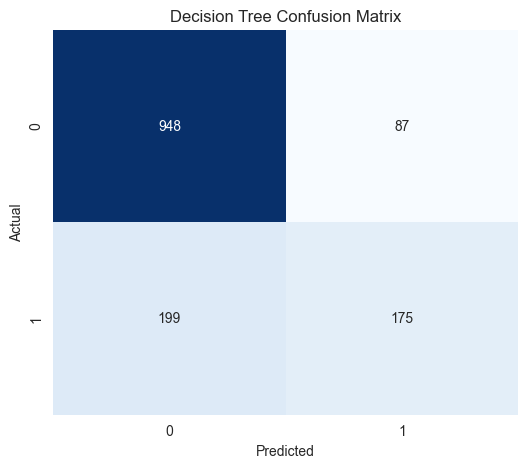

In [9]:
y_pred = dt_clf.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Save the Model

In [10]:
joblib.dump(dt_clf, "results/decision_tree_model.pkl")
print("Decision Tree Model saved as decision_tree_model.pkl")

Decision Tree Model saved as decision_tree_model.pkl
